In [185]:
import pandas as pd
from binance import Client
import datetime as dt
# client configuration
api_key = 'A1uGNNpD8XAJAfg1Ar6fxJj8u3FRpg5fcere4PN8gW2D2UEtUvg0j6890GwryC9C' 
api_secret = 'TYTOuCGwruYamR1msJeQhpsKwV64wCFFuXMIb6kUKog1WBkGjPbXfLzVpDMpN3Z6'
client = Client(api_key, api_secret)

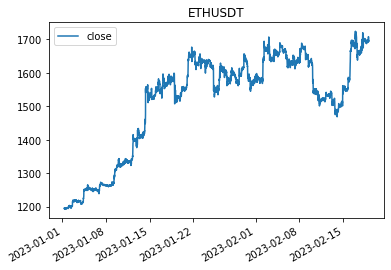

In [197]:
symbol = "ETHUSDT"
interval='15m'
Client.KLINE_INTERVAL_15MINUTE 
klines = client.get_historical_klines(symbol, interval, "1 Jan,2023")
df = pd.DataFrame()
df = pd.DataFrame(klines)
 # create colums name
df.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
            
# change the timestamp
df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
df.to_csv(symbol+'.csv', index = None, header=True)

#convert data to float and plot
df = df.astype(float)
df["close"].plot(title = 'ETHUSDT', legend = 'close')

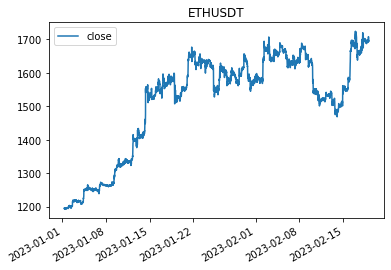

In [198]:
df["close"].plot(title = 'ETHUSDT', legend = 'close')

In [190]:
print(df)

          open_time           open           high            low  \
0     1672531200000  1196.13000000  1196.69000000  1194.55000000   
1     1672532100000  1194.55000000  1196.70000000  1194.31000000   
2     1672533000000  1196.62000000  1196.62000000  1192.72000000   
3     1672533900000  1193.64000000  1195.06000000  1193.63000000   
4     1672534800000  1194.09000000  1195.75000000  1193.84000000   
...             ...            ...            ...            ...   
4680  1676743200000  1695.00000000  1713.13000000  1693.67000000   
4681  1676744100000  1707.87000000  1709.29000000  1699.01000000   
4682  1676745000000  1701.43000000  1702.39000000  1687.52000000   
4683  1676745900000  1694.38000000  1696.47000000  1693.09000000   
4684  1676746800000  1693.58000000  1693.99000000  1693.32000000   

              close          volume     close_time                qav  \
0     1194.55000000   1245.88550000  1672532099999   1489586.28256600   
1     1196.61000000   1141.60750000  

In [142]:
account = 1000
trades = []
portfolio = pd.DataFrame()
eth = 0


In [219]:
# t is pandas timestamp
def price(t):
    return df.loc[t,'close']

def current_portfolio(t):
    return account + eth*price(t)

def buy(t):
    p = price(t)
    global eth
    global trades
    global account
    
    eth += account/p
    trades.append((t,'BUY',eth))
    account -= eth*p
    
def sell(t):
    p = price(t)
    global eth
    global trades
    global account
    
    eth_init = eth
    account += eth_init * price(t)
                  
    trades.append((t,'SELL',eth*p))
    eth = 0 



In [220]:
cdata = df.close.pct_change() * 100

In [195]:
cdata

2023-01-01 08:14:59.999         NaN
2023-01-01 08:29:59.999    0.172450
2023-01-01 08:44:59.999   -0.248201
2023-01-01 08:59:59.999    0.037700
2023-01-01 09:14:59.999    0.108032
                             ...   
2023-02-19 00:29:59.999   -0.111502
2023-02-19 00:44:59.999   -0.044887
2023-02-19 00:59:59.999    0.051407
2023-02-19 01:14:59.999   -0.010630
2023-02-19 01:29:59.999    0.098046
Name: close, Length: 4678, dtype: float64

In [225]:
account = 10000
trades1 = [()]
eth = 0
portfolio1 = pd.DataFrame({'account':[], 'eth':[], 'total':[]})

for i in cdata[1:].index:
    x = cdata.loc[i]
    t = pd.Timestamp(i)
    
    # Sell if percent change was positive (sell high)
    if x < 0 and 'BUY' not in trades1[-1]:
        buy(t)
    
    # Buy if percent change was negative (buy low)
    if x > 0 and 'SELL' not in trades1[-1]:
        sell(t)
    
    portfolio1 = portfolio1.append(pd.DataFrame(
        {
            'account':account,
            'eth':eth,
            'total':current_portfolio(t)
        },index=[t]
    ))

In [226]:
account = 10000
trades2 = [()]
eth = 0
portfolio2 = pd.DataFrame({'account':[], 'eth':[], 'total':[]})

for i in cdata[1:].index:
    x = cdata.loc[i]
    t = pd.Timestamp(i)
    
    # Sell if percent change was positive (sell high)
    if x < 0 and 'SELL' not in trades2[-1]:
        sell(t)
    
    # Buy if percent change was negative (buy low)
    if x > 0 and 'BUY' not in trades2[-1]:
        buy(t)
    
    portfolio2 = portfolio2.append(pd.DataFrame(
        {
            'account':account,
            'eth':eth,
            'total':current_portfolio(t)
        },index=[t]
    ))

In [201]:
portfolio.index

DatetimeIndex(['2023-01-01 08:29:59.999000', '2023-01-01 08:44:59.999000',
               '2023-01-01 08:59:59.999000', '2023-01-01 09:14:59.999000',
               '2023-01-01 09:29:59.999000', '2023-01-01 09:44:59.999000',
               '2023-01-01 09:59:59.999000', '2023-01-01 10:14:59.999000',
               '2023-01-01 10:29:59.999000', '2023-01-01 10:44:59.999000',
               ...
               '2023-02-18 23:14:59.999000', '2023-02-18 23:29:59.999000',
               '2023-02-18 23:44:59.999000', '2023-02-18 23:59:59.999000',
               '2023-02-19 00:14:59.999000', '2023-02-19 00:29:59.999000',
               '2023-02-19 00:44:59.999000', '2023-02-19 00:59:59.999000',
               '2023-02-19 01:14:59.999000', '2023-02-19 01:29:59.999000'],
              dtype='datetime64[ns]', length=4677, freq=None)

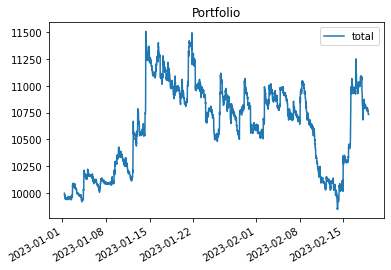

In [230]:
# change the timestamp
portfolio.to_csv('portfolio.csv', index = None, header=True)

#convert data to float and plot
portfolio = portfolio.astype(float)
portfolio["total"].plot(title = 'Portfolio', legend = 'value')

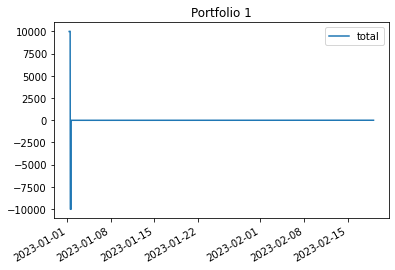

In [228]:
# change the timestamp
portfolio1.to_csv('portfolio1.csv', index = None, header=True)

#convert data to float and plot
portfolio1 = portfolio1.astype(float)
portfolio1["total"].plot(title = 'Portfolio 1', legend = 'port1')

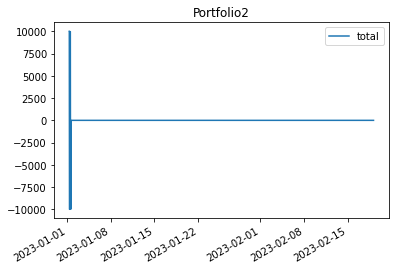

In [229]:
# change the timestamp
portfolio2.to_csv('portfolio2.csv', index = None, header=True)

#convert data to float and plot
portfolio2 = portfolio2.astype(float)
portfolio2["total"].plot(title = 'Portfolio2', legend = 'port2')

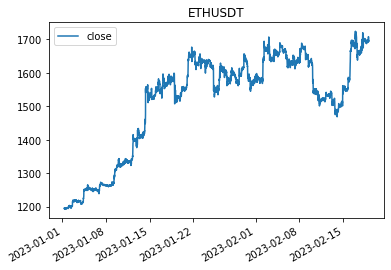

In [203]:
df["close"].plot(title = 'ETHUSDT', legend = 'close')

In [206]:
eth_portfolio = df["close"].apply(lambda x: x*10000/df["close"][1])

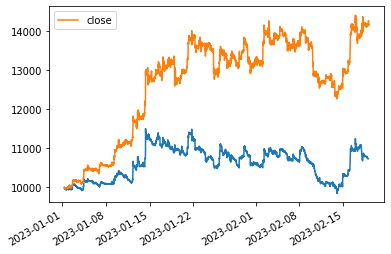

In [214]:
ax = portfolio["total"].plot()
eth_portfolio.plot(ax=ax, legend = ['pure eth', 'portfolio'])

In [232]:
# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline